In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense,TimeDistributed, Dropout
from keras.models import Sequential
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.models import load_model
tf.config.experimental.set_visible_devices([], 'GPU')

Using TensorFlow backend.


In [2]:
X=np.load('load_data.npy')
y=np.load('label.npy')
# y=keras.utils.to_categorical(y, num_classes=2, dtype='float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [3]:
hidden_nodes = int(2/3 * (X_train.shape[1]))

In [4]:
model = Sequential()
model.add(LSTM(4, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(y_train.shape[2],activation='sigmoid'), input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
adam=keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5576, 4)           160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5576, 4)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5576, 1)           5         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5576, 1)           0         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 12 samples, validate on 3 samples
Epoch 1/100
 - 4s - loss: 2.0383 - accuracy: 0.4139 - val_loss: 0.6836 - val_accuracy: 0.6710
Epoch 2/100
 - 3s - loss: 1.9789 - accuracy: 0.4369 - val_loss: 0.6533 - val_accuracy: 0.6841
Epoch 3/100
 - 3s - loss: 1.9526 - accuracy: 0.4465 - val_loss: 0.6244 - val_accuracy: 0.7052
Epoch 4/100
 - 3s - loss: 1.9267 - accuracy: 0.6281 - val_loss: 0.5954 - val_accuracy: 0.7120
Epoch 5/100
 - 3s - loss: 1.9006 - accuracy: 0.7222 - val_loss: 0.5646 - val_accuracy: 0.7167
Epoch 6/100
 - 3s - loss: 1.8689 - accuracy: 0.7274 - val_loss: 0.5327 - val_accuracy: 0.7212
Epoch 7/100
 - 3s - loss: 1.8427 - accuracy: 0.7137 - val_loss: 0.5113 - val_accuracy: 0.7253
Epoch 8/100
 - 3s - loss: 1.8005 - accuracy: 0.7077 - val_loss: 0.5009 - val_accuracy: 0.7361
Epoch 9/100
 - 3s - loss: 1.8225 - accuracy: 0.7053 - val_loss: 0.4938 - val_accuracy: 0.7495
Epoch 10/100
 - 3s - loss: 1.7824 - accuracy: 0.7118 - val_loss: 0.4839 - val_accuracy: 0.7599
Epoch 11/100
 - 

Epoch 87/100
 - 3s - loss: 1.6972 - accuracy: 0.7682 - val_loss: 0.4147 - val_accuracy: 0.8064
Epoch 88/100
 - 3s - loss: 1.7076 - accuracy: 0.7669 - val_loss: 0.4148 - val_accuracy: 0.8061
Epoch 89/100
 - 3s - loss: 1.7119 - accuracy: 0.7670 - val_loss: 0.4148 - val_accuracy: 0.8058
Epoch 90/100
 - 3s - loss: 1.7187 - accuracy: 0.7670 - val_loss: 0.4145 - val_accuracy: 0.8058
Epoch 91/100
 - 3s - loss: 1.7071 - accuracy: 0.7677 - val_loss: 0.4143 - val_accuracy: 0.8057
Epoch 92/100
 - 4s - loss: 1.7465 - accuracy: 0.7645 - val_loss: 0.4140 - val_accuracy: 0.8057
Epoch 93/100
 - 3s - loss: 1.7003 - accuracy: 0.7692 - val_loss: 0.4135 - val_accuracy: 0.8058
Epoch 94/100
 - 3s - loss: 1.6896 - accuracy: 0.7674 - val_loss: 0.4132 - val_accuracy: 0.8059
Epoch 95/100
 - 4s - loss: 1.7233 - accuracy: 0.7661 - val_loss: 0.4132 - val_accuracy: 0.8058
Epoch 96/100
 - 4s - loss: 1.6938 - accuracy: 0.7685 - val_loss: 0.4133 - val_accuracy: 0.8060
Epoch 97/100
 - 4s - loss: 1.7279 - accuracy: 0.76

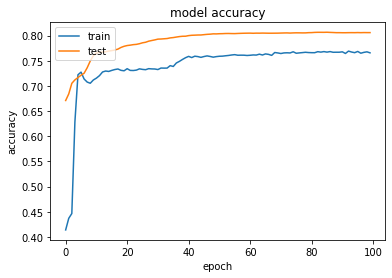

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
model.save("model.h5")

In [8]:
# model = load_model('model.h5')
# model.summary()

In [11]:
X_eval=np.expand_dims(X[-1],axis=0)
X_eval.shape
y_eval=np.expand_dims(y[-1],axis=0)
score = model.predict(X_eval, verbose=0).reshape(-1)

In [12]:
timestamp=np.load('timestamp.npy')

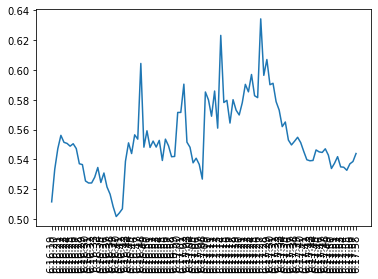

In [16]:
fig = plt.figure()
plt.plot(range(0,100),score[:100])
plt.xticks(range(0,100),timestamp[14,:100], rotation='vertical')
plt.show()

In [17]:
plt.savefig('save_swing.pdf')

<Figure size 432x288 with 0 Axes>